In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('datos_sabi.csv', encoding = "ISO-8859-1")

C:\Users\jaude\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data = data.rename(columns={'codigo_nif': 'nif'})

In [4]:
data.columns

Index(['Unnamed: 0', 'nombre', 'nif', 'localidad', 'estado_detallado',
       'fecha_cambio_estado', 'estado', 'ultimo_ano_disponible',
       'fecha_constitucion', 'codigo_primario_cnae_2009', 'fase_actual',
       'fecha_fase_actual', 'incidencias_judiciales', 'tipo', 'anyo',
       'acreedores_a_l_p_mil_eur', 'acreedores_comerciales_mil_eur',
       'activo_circulante_mil_eur', 'apalancamiento_percent_percent',
       'beneficio_por_empleado_mil', 'capital_circulante_por_empleado_mil',
       'capital_suscrito_mil_eur', 'cash_flow_mil_eur',
       'coeficiente_de_solvencia_percent_percent',
       'consumo_de_mercaderias_y_de_materias_mil_eur',
       'coste_medio_de_los_empleados_mil',
       'costes_de_los_trabajadores_ingresos_de_explotacion_percent_percent',
       'deudas_financieras_mil_eur', 'deudores_mil_eur',
       'dotaciones_para_amortiz_de_inmovil_mil_eur', 'ebit_mil_eur',
       'ebitda_mil_eur', 'existencias_mil_eur', 'fondo_de_maniobra_mil_eur',
       'fondos_propio

In [5]:
data

,Unnamed: 0,nombre,nif,localidad,estado_detallado,fecha_cambio_estado,estado,ultimo_ano_disponible,fecha_constitucion,codigo_primario_cnae_2009,...,resultado_financiero_mil_eur,resultados_actividades_extraordinarias_mil_eur,rotacion_de_activos_netos_percent,rotacion_de_las_existencias_percent,tesoreria_mil_eur,total_activo_mil_eur,total_activos_por_empleado_mil,total_pasivo_y_capital_propio_mil_eur,valor_agregado_mil_eur,sector
0,1,ABEREKIN SOCIEDAD ANONIMA,A48165468,DERIO,Activa,1985-01-31,Activa,2020-12-31,1985-01-31,149,...,-45.00000,NaN,0.515,2.621,832.00000,8953.00000,426.333333,8953.00000,1614.00000,Agricultura
1,2,ABEREKIN SOCIEDAD ANONIMA,A48165468,DERIO,Activa,1985-01-31,Activa,2020-12-31,1985-01-31,149,...,40.00000,NaN,0.590,2.558,767.00000,7147.00000,324.863636,7147.00000,1606.00000,Agricultura
2,3,ABEREKIN SOCIEDAD ANONIMA,A48165468,DERIO,Activa,1985-01-31,Activa,2020-12-31,1985-01-31,149,...,119.00000,NaN,0.541,2.081,709.00000,7148.00000,310.782608,7148.00000,1539.00000,Agricultura
3,4,ABEREKIN SOCIEDAD ANONIMA,A48165468,DERIO,Activa,1985-01-31,Activa,2020-12-31,1985-01-31,149,...,62.00000,NaN,0.473,1.704,592.00000,7527.00000,342.136363,7527.00000,1589.00000,Agricultura
4,5,ABEREKIN SOCIEDAD ANONIMA,A48165468,DERIO,Activa,1985-01-31,Activa,2020-12-31,1985-01-31,149,...,-4.00000,NaN,0.474,1.523,343.00000,7544.00000,342.909090,7544.00000,1581.00000,Agricultura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207139,207140,ZUTIK GARRAIOAK SL,B95055950,BERRIATUA,Activa,1999-11-02,Activa,2015-12-31,1999-11-02,4941,...,-0.36633,NaN,6.013,10.005,3.68358,32.21047,16.105235,32.21047,13.24093,Transporte
207140,207141,ZUTIK GARRAIOAK SL,B95055950,BERRIATUA,Activa,1999-11-02,Activa,2015-12-31,1999-11-02,4941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
207141,207142,ZUTIK GARRAIOAK SL,B95055950,BERRIATUA,Activa,1999-11-02,Activa,2015-12-31,1999-11-02,4941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
207142,207143,ZUTIK GARRAIOAK SL,B95055950,BERRIATUA,Activa,1999-11-02,Activa,2015-12-31,1999-11-02,4941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte


In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df.to_csv('percentage_missing.csv')

In [7]:
data.anyo.value_counts()

ult_ano_disp    17262
2009            17262
2010            17262
2011            17262
2012            17262
2013            17262
2014            17262
2015            17262
2016            17262
2017            17262
2018            17262
2019            17262
Name: anyo, dtype: int64

In [8]:
data[data.estado_detallado.isnull()]

,Unnamed: 0,nombre,nif,localidad,estado_detallado,fecha_cambio_estado,estado,ultimo_ano_disponible,fecha_constitucion,codigo_primario_cnae_2009,...,resultado_financiero_mil_eur,resultados_actividades_extraordinarias_mil_eur,rotacion_de_activos_netos_percent,rotacion_de_las_existencias_percent,tesoreria_mil_eur,total_activo_mil_eur,total_activos_por_empleado_mil,total_pasivo_y_capital_propio_mil_eur,valor_agregado_mil_eur,sector
108,109,AGRICOLA ALAVESA SA,B01005487,VITORIA-GASTEIZ,NaN,1967-07-13,Activa,2010-12-31,1967-07-13,161,...,-0.32943,NaN,282.636,NaN,2.80837,2.80837,0.351046,2.80837,4.230579,Agricultura
109,110,AGRICOLA ALAVESA SA,B01005487,VITORIA-GASTEIZ,NaN,1967-07-13,Activa,2010-12-31,1967-07-13,161,...,-0.63856,NaN,0.489,2.205,3.91372,327.74781,40.968476,327.74781,42.302299,Agricultura
110,111,AGRICOLA ALAVESA SA,B01005487,VITORIA-GASTEIZ,NaN,1967-07-13,Activa,2010-12-31,1967-07-13,161,...,-0.32943,NaN,282.636,NaN,2.80837,2.80837,0.351046,2.80837,4.230579,Agricultura
111,112,AGRICOLA ALAVESA SA,B01005487,VITORIA-GASTEIZ,NaN,1967-07-13,Activa,2010-12-31,1967-07-13,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agricultura
112,113,AGRICOLA ALAVESA SA,B01005487,VITORIA-GASTEIZ,NaN,1967-07-13,Activa,2010-12-31,1967-07-13,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agricultura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207091,207092,ZUBIGOIZ S.L.(EXTINGUIDA),B20511697,ZARAUTZ,NaN,2006-02-02,Extinguida,2001-12-31,1994-12-28,4941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
207092,207093,ZUBIGOIZ S.L.(EXTINGUIDA),B20511697,ZARAUTZ,NaN,2006-02-02,Extinguida,2001-12-31,1994-12-28,4941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
207093,207094,ZUBIGOIZ S.L.(EXTINGUIDA),B20511697,ZARAUTZ,NaN,2006-02-02,Extinguida,2001-12-31,1994-12-28,4941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
207094,207095,ZUBIGOIZ S.L.(EXTINGUIDA),B20511697,ZARAUTZ,NaN,2006-02-02,Extinguida,2001-12-31,1994-12-28,4941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte


In [9]:
concurso = pd.read_csv('publicidad_concursal.csv', encoding = "ISO-8859-1")

In [10]:
concurso

,fecha_resolucion,tipo_resolucion,deudor,no_procedimiento,nif,no_expediente,unnamed_3
0,15-07-2021,Auto de conclusión de concurso,TALLERES MECANICOS VEGA LOPEZ HERMANOS S.A.,332/2017,A01017185,NaN,NaN
1,17-09-2021,Auto de conclusión de concurso,GALVANIZADOS VITORIA S.A.,6/2015,A01021708,NaN,NaN
2,25-09-2019,Auto de conclusión de concurso,TALLER AUXILIAR DE GALVANOTECNIA ALAVESA S.A.,341/2013,A01027184,NaN,NaN
3,25-11-2019,Auto de conclusión de concurso,HOTEL INDAUTXU SA,656/2015,A01037415,NaN,NaN
4,16-04-2021,Auto de conclusión de concurso,CEGA MULTIDISTRIBUCION S.A.,183/2014,A01129311,NaN,NaN
...,...,...,...,...,...,...,...
3509,NaN,Auto de Aprobación de la homologación del acue...,"NUEVA LOGÍSTICA INTEGRAL, S.L.U.",NaN,B31688559,47/2019,NaN
3510,NaN,Nombramiento de mediador Concursal,Permesa Berria Sociedad Limitada en liquidación,NaN,B95714655,15-2021,NaN
3511,NaN,Apertura del expediente del acuerdo extrajudic...,TALLERES MECANICOS TAU SL,NaN,B20625802,MEC/2018/33,NaN
3512,NaN,Adopción del acuerdo extrajudicial de pagos,TALLERES MECANICOS TAU SL,NaN,B20625802,MEC/2018/33,NaN


In [11]:
df = pd.merge(data, concurso, on="nif",how='inner')

In [12]:
df[['nombre','deudor','nif']]

,nombre,deudor,nif
0,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
1,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
2,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
3,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
4,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
...,...,...,...
42163,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356
42164,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356
42165,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356
42166,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356


In [13]:
# Quitar signos de puntuacion
df["nombre"] = df['nombre'].str.replace('[^\w\s]','')
df["deudor"] = df['deudor'].str.replace('[^\w\s]','')

# Pasar a mayusculas
df["nombre"] = df['nombre'].str.upper()
df["deudor"] = df['deudor'].str.upper()

# Cambiar SL
df["nombre"] = df['nombre'].str.replace('SOCIEDAD LIMITADA','SL')
df["deudor"] = df['deudor'].str.replace('SOCIEDAD LIMITADA','SL')

# Cambiar SA
df["nombre"] = df['nombre'].str.replace('SOCIEDAD ANONIMA','SA')
df["deudor"] = df['deudor'].str.replace('SOCIEDAD ANONIMA','SA')

# Cambiar Extinguida | Liquidacion
df["nombre"] = df['nombre'].str.replace('EXTINGUIDA','')
df["deudor"] = df['deudor'].str.replace('EXTINGUIDA','')
df["nombre"] = df['nombre'].str.replace('EN LIQUIDACION','')
df["deudor"] = df['deudor'].str.replace('EN LIQUIDACION','')

C:\Users\jaude\AppData\Local\Temp/ipykernel_11316/3758155119.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["nombre"] = df['nombre'].str.replace('[^\w\s]','')
C:\Users\jaude\AppData\Local\Temp/ipykernel_11316/3758155119.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["deudor"] = df['deudor'].str.replace('[^\w\s]','')


In [14]:
from fuzzywuzzy import fuzz
def get_similarity(term1, term2):

    print(fuzz.ratio(term1, term2))

    return fuzz.ratio(term1, term2)

In [15]:
nombres = df[['nombre','deudor','nif']]
nombres['similarity'] = nombres.apply(lambda x: get_similarity(x['deudor'], x['nombre']), axis = 1)

97
97
97
97
97
97
97
97
97
97
97
97
98
98
98
98
98
98
98
98
98
98
98
98
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
100
100
100
100
100
99
99
99
99
100
100


C:\Users\jaude\AppData\Local\Temp/ipykernel_11316/484736773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nombres['similarity'] = nombres.apply(lambda x: get_similarity(x['deudor'], x['nombre']), axis = 1)


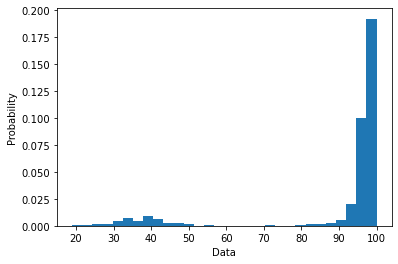

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(nombres.similarity, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [39]:
nif_quiebra = nombres[nombres.similarity > 60].nif
nif_estado = data[(data.estado == 'Concurso') | (data.estado == 'Quiebra')].nif
nif_quiebra = nif_quiebra.append(nif_estado)
# Quitar signos de puntuacion
data["estado_detallado"] = data["estado_detallado"].str.replace('[^\w\s]','')
# Pasar a mayusculas
data["estado_detallado"] = data["estado_detallado"].str.upper()
data["fase_actual"] = data["fase_actual"].str.upper()
nif_detallado = data[data.estado_detallado.str.contains('CONCURSO | CONCURSAL | QUIEBRA', na=False)].nif
nif_faseactual = data[data.fase_actual.str.contains('CONCURSO | CONCURSAL | QUIEBRA', na=False)].nif
nif_quiebra = nif_quiebra.append(nif_detallado)
nif_quiebra = nif_quiebra.append(nif_faseactual)

C:\Users\jaude\AppData\Local\Temp/ipykernel_11316/2279712066.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data["estado_detallado"] = data["estado_detallado"].str.replace('[^\w\s]','')


In [40]:
dict = dict.fromkeys(nif_quiebra, 1)
data['quiebra'] = data['nif'].map(dict)
data.quiebra.fillna(0, inplace=True)

In [41]:
data.quiebra.unique()

array([0., 1.])

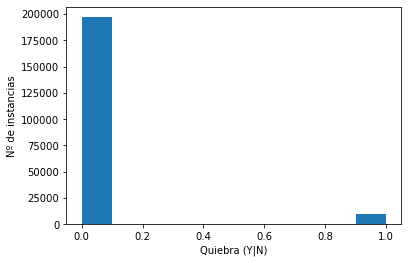

In [42]:
plt.hist(data.quiebra,)  # density=False would make counts
plt.ylabel('Nº de instancias')
plt.xlabel('Quiebra (Y|N)');